In [ ]:
%matplotlib inline

In [ ]:
import torch
import numpy as np
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/DisasterDataset3.zip' -d '/content'

Streaming output truncated to the last 5000 lines.
  inflating: /content/DisasterDataset2/test/Flood/03_0053.png  
  inflating: /content/DisasterDataset2/test/Flood/03_0054.png  
  inflating: /content/DisasterDataset2/test/Flood/03_0055.png  
  inflating: /content/DisasterDataset2/test/Flood/03_0056.png  
  inflating: /content/DisasterDataset2/test/Flood/03_0057.png  
  inflating: /content/DisasterDataset2/test/Flood/03_0058.png  
  inflating: /content/DisasterDataset2/test/Flood/03_0059.png  
  inflating: /content/DisasterDataset2/test/Flood/03_0060.png  
  inflating: /content/DisasterDataset2/test/Flood/03_0061.png  
  inflating: /content/DisasterDataset2/test/Flood/03_0062.png  
  inflating: /content/DisasterDataset2/test/Flood/03_0063.png  
  inflating: /content/DisasterDataset2/test/Flood/03_0064.png  
  inflating: /content/DisasterDataset2/test/Flood/03_0065.png  
  inflating: /content/DisasterDataset2/test/Flood/03_0066.png  
  inflating: /content/DisasterDataset2/test/Flood/03_

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.datasets import ImageFolder


TRAIN_DATA_PATH = "/content/DisasterDataset2/train"
TEST_DATA_PATH = "/content/DisasterDataset2/test"

transform = transforms.Compose(
    [transforms.Resize((256,256)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = ImageFolder(root=TRAIN_DATA_PATH, transform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True,  num_workers=2)
testset = ImageFolder(root=TEST_DATA_PATH, transform=transform)
testloader  = DataLoader(testset, batch_size=batch_size, shuffle=True, num_workers=2) 

classes = ('Drought', 'Earthquake', 'Fire', 'Flood', 'Normal')

img, label = trainset[0]
print(img.shape,label)
print("\nFollowing classes are there : \n",trainset.classes)

torch.Size([3, 256, 256]) 0

Following classes are there : 
 ['Drought', 'Earthquake', 'Fire', 'Flood', 'Normal']


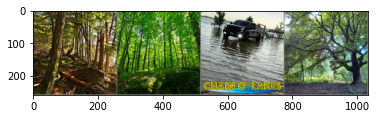

Normal Normal Flood Normal


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)   #First 3 is our channels and 6 our filters and the last 5 is 5x5 filter2 size:252*252*6
        self.pool = nn.MaxPool2d(2, 2)    #First 2 is our 2x2 filter size and the second 2 is our stride: 126*126*6
        self.conv2 = nn.Conv2d(6, 16, 5)  # :122*122*16
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(16 * 61 * 61, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x))
        return x


net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(16):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,   200] loss: 1.259
[1,   400] loss: 1.094
[1,   600] loss: 0.863
[1,   800] loss: 0.861
[1,  1000] loss: 0.732
[2,   200] loss: 0.731
[2,   400] loss: 0.682
[2,   600] loss: 0.681
[2,   800] loss: 0.595
[2,  1000] loss: 0.637
[3,   200] loss: 0.439
[3,   400] loss: 0.442
[3,   600] loss: 0.412
[3,   800] loss: 0.498
[3,  1000] loss: 0.449
[4,   200] loss: 0.185
[4,   400] loss: 0.284
[4,   600] loss: 0.257
[4,   800] loss: 0.272
[4,  1000] loss: 0.266
[5,   200] loss: 0.095
[5,   400] loss: 0.108
[5,   600] loss: 0.164
[5,   800] loss: 0.209
[5,  1000] loss: 0.176
[6,   200] loss: 0.051
[6,   400] loss: 0.085
[6,   600] loss: 0.092
[6,   800] loss: 0.072
[6,  1000] loss: 0.104
[7,   200] loss: 0.075
[7,   400] loss: 0.081
[7,   600] loss: 0.055
[7,   800] loss: 0.070
[7,  1000] loss: 0.043
[8,   200] loss: 0.026
[8,   400] loss: 0.016
[8,   600] loss: 0.018
[8,   800] loss: 0.012
[8,  1000] loss: 0.029
[9,   200] loss: 0.134
[9,   400] loss: 0.032
[9,   600] loss: 0.028
[9,   800] 

In [ ]:
PATH = '/content/drive/MyDrive/disaster.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
PATH = '/content/drive/MyDrive/disaster.pth'

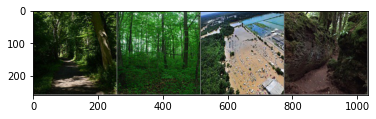

GroundTruth:  Normal Normal Flood Normal


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  Normal Normal Flood Normal


In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 1393 test images: {100 * correct // total} %')

Accuracy of the network on the 1393 test images: 79 %


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

testPreds=torch.Tensor(())
testLabels=torch.Tensor(())
# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        #testPreds=torch.cat((testPreds,predictions),0)
        #testLabels=torch.cat((testLabels,labels),0)

        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: Drought is 68.8 %
Accuracy for class: Earthquake is 71.5 %
Accuracy for class: Fire  is 78.1 %
Accuracy for class: Flood is 66.8 %
Accuracy for class: Normal is 93.5 %


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report

In [ ]:
Model_pred = pd.read_excel("/content/drive/MyDrive/model2.xlsx",index_col =[0])

In [ ]:
Model_pred.head()

Actual_class Predicted_class
S.No                             
1          Normal         Drought
2           Flood           Flood
3           Flood           Flood
4           Flood           Flood
5          Normal          Normal

In [ ]:
cm = pd.crosstab(Model_pred.Predicted_class,Model_pred.Actual_class)

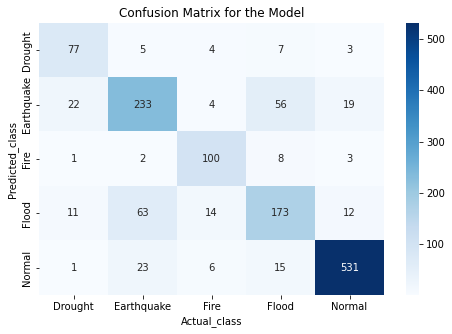

In [ ]:
fig = plt.figure(figsize=(17,5))
ax1 = plt.subplot(121)
ax1.set_title("Confusion Matrix for the Model")
sn.heatmap(cm,annot=True,cmap='Blues',fmt='g')

In [ ]:
np.diag(cm).sum()/cm.sum().sum()

0.7997128499641063

In [ ]:
for i in range(cm.shape[0]):
  TP = cm.iloc[i,i]
  FP = cm.iloc[i,:].sum()-TP
  FN = cm.iloc[:,i].sum()-TP
  TN = cm.sum().sum()- TP-FP-FN
  Accuracy = (TP+TN)/cm.sum().sum()
  Precision = TP/(TP+FP)
  Recall = TP/(TP+FN)
  F1_Score = (2*Precision*Recall)/(Precision+Recall)
  print(cm.index[i],Accuracy,Precision,Recall,F1_Score)

Drought 0.9612347451543432 0.8020833333333334 0.6875 0.7403846153846154
Earthquake 0.8607322325915291 0.6976047904191617 0.7147239263803681 0.706060606060606
Fire 0.9698492462311558 0.8771929824561403 0.78125 0.8264462809917354
Flood 0.8664752333094041 0.6336996336996337 0.667953667953668 0.650375939849624
Normal 0.9411342426417804 0.921875 0.9348591549295775 0.9283216783216783


In [ ]:
pd.DataFrame(classification_report(Model_pred.Actual_class,Model_pred.Predicted_class,output_dict=True)).T

precision    recall  f1-score      support
Drought        0.802083  0.687500  0.740385   112.000000
Earthquake     0.697605  0.714724  0.706061   326.000000
Fire           0.877193  0.781250  0.826446   128.000000
Flood          0.633700  0.667954  0.650376   259.000000
Normal         0.921875  0.934859  0.928322   568.000000
accuracy       0.799713  0.799713  0.799713     0.799713
macro avg      0.786491  0.757257  0.770318  1393.000000
weighted avg   0.802072  0.799713  0.800157  1393.000000